In [12]:
from easyCore import np
from easyDiffractionLib.sample import Runner
from easyDiffractionLib import Phase
import matplotlib.pyplot as plt
%matplotlib notebook

In [13]:
r = Runner()
p = Phase.from_cif_file('PbSO4.cif')
r.add_job('testing')
r.add_phase(p, 'testing')
job = r.jobs['testing']

Temp CIF: /tmp/easydiffraction_temp.cif


<IPython.core.display.Javascript object>


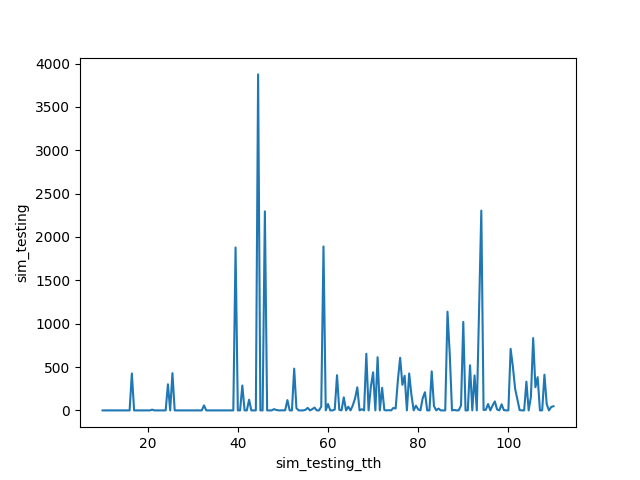

In [14]:
job.create_simulation(np.linspace(10, 110, 201))
job.plot_simulation()
plt.show()

<IPython.core.display.Javascript object>


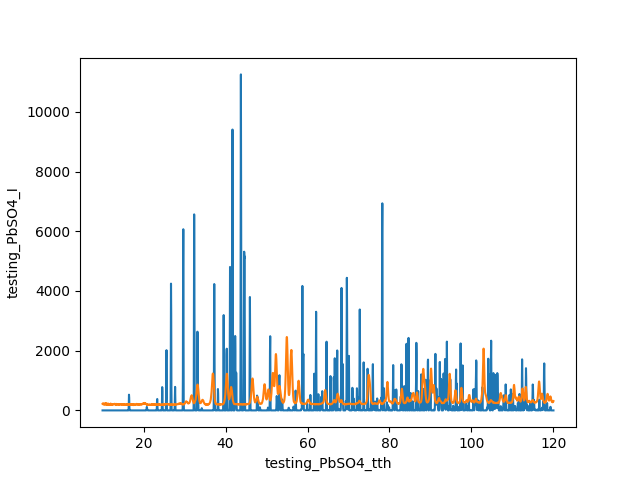

In [15]:
file_path = 'PbSO4_neutrons_short.xye'
job.add_experiment('PbSO4', file_path)
job.simulate_experiment('PbSO4')
plt.figure()
job.plot_simulation('PbSO4')
job.plot_experiment('PbSO4')
plt.show()

<IPython.core.display.Javascript object>


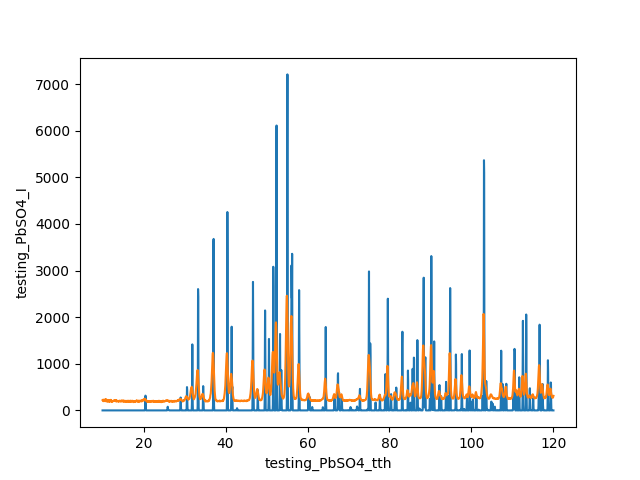

In [16]:
job.parameters.wavelength = 1.912
job.parameters.u_resolution = 1.4
job.parameters.v_resolution = -0.42
job.parameters.w_resolution = 0.38
job.parameters.x_resolution = 0.0
job.parameters.y_resolution = 0.0
job.simulate_experiment('PbSO4')
plt.figure()
job.plot_simulation('PbSO4')
job.plot_experiment('PbSO4')
plt.show()

<IPython.core.display.Javascript object>


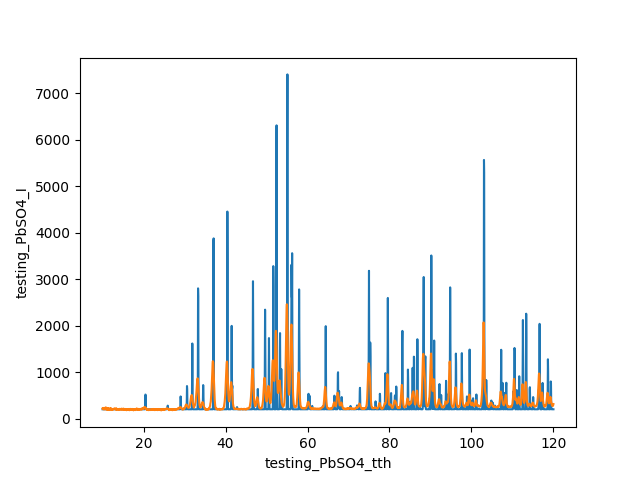

In [17]:
from easyDiffractionLib.Elements.Backgrounds.Point import PointBackground, BackgroundPoint

bg = PointBackground(linked_experiment='PbSO4')
bg.append(BackgroundPoint.from_pars(10, 200))
bg.append(BackgroundPoint.from_pars(120, 200))

job.set_background(bg)
job.simulate_experiment('PbSO4')
plt.figure()
job.plot_simulation('PbSO4')
job.plot_experiment('PbSO4')
plt.show()

<IPython.core.display.Javascript object>


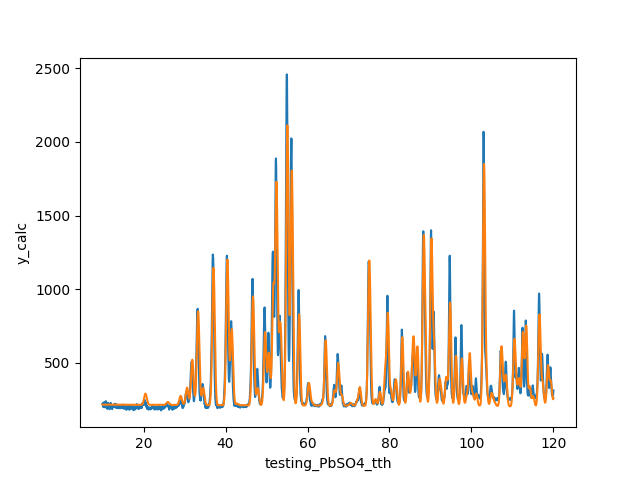

In [18]:
job.pattern.scale.fixed = False
job.parameters.resolution_u.fixed = False
job.parameters.resolution_v.fixed = False
job.parameters.resolution_w.fixed = False
job.backgrounds[0][0].y.fixed = False
job.backgrounds[0][1].y.fixed = False

result = job.fit_experiment('PbSO4')
plt.figure()
job.plot_experiment('PbSO4')
result.y_calc.plot()
plt.show()